# Priority Queue

## Agenda

1. "Priority Queue"
2. Naive implementation
3. Heap
    - Mechanics
    - Implementation
    - Run-time Analysis
4. Heap Construction
5. Heapsort

## 1. Priority Queue

The priority queue ADT is similar to a queue, in that values are conceptually added to one end and taken out another. Values are not dequeued from a priority queue in FIFO order, however. Instead, each value in a priority queue has an implicit "priority", and the *value with maximum priority is always dequeued first*, regardless of when it was enqueued. 

## 2. Naive implementation

In [1]:
class PriorityQueue:
    def __init__(self):
        self.data = []
        
    def add(self, x): # O(N)
        # insert x in the correct place (to keep data in ascending order)
        for i in range(len(self.data)):
            if self.data[i] > x:
                self.data.insert(i, x)
                break
        else:
            self.data.append(x)
    
    def max(self): # O(1)
        assert len(self) > 0
        return self.data[-1]
        
    def pop_max(self): # O(1)
        assert len(self) > 0
        ret = self.data[-1]
        del self.data[-1]
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
import random

pq = PriorityQueue()

vals = random.sample(range(100), 10)
for x in vals:
    pq.add(x)

In [3]:
pq

[1, 14, 27, 33, 38, 44, 56, 90, 96, 98]

In [4]:
while pq:
    print(pq.pop_max())

98
96
90
56
44
38
33
27
14
1


## 3. Heap

A heap is an implementation of a priority queue that imposes a *partial ordering* on its contents. A heap takes the form of a *complete binary tree* where every node adheres to the *heap property*, i.e., that the value in a given node is the maximum value in the subtree of which it is the root.

### Mechanics

The heap property is maintained across insertions and removals by way of the "bubble up" and "trickle down" algorithms.

![](images/heap-mechanics.jpg)

Note that the "trickle down" algorithm can also be thought of as a way of "re-heapifying" a tree where all nodes but the root obey the heap property.

### Implementation

In [5]:
class Heap:
    def __init__(self):
        self.data = []
        
    @staticmethod
    def _parent(idx):
        return (idx - 1) // 2
    
    @staticmethod
    def _left(idx):
        return idx*2 + 1

    @staticmethod
    def _right(idx):
        return idx*2 + 2

    def add(self, x):
        self.data.append(x) # add the value at the bottom right of the tree
        
        # carry out the bubble-up algorithm
        idx = len(self.data) - 1
        while idx > 0:
            pidx = Heap._parent(idx)
            if self.data[pidx] < self.data[idx]: # i.e., max-heap property is false
                self.data[pidx], self.data[idx] = self.data[idx], self.data[pidx]
                idx = pidx
            else:
                break    
                
    def max(self):
        assert len(self) > 0
        return self.data[0]


    def pop_max(self):
        assert len(self) > 0
        ret = self.data[0]
        
        # move the bottom-right value to the root
        self.data[0] = self.data[-1]
        del self.data[-1]
        
        # re-heapify using the trickle down algorithm
        idx = 0
        while idx < len(self.data):
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            maxidx = idx
            if lidx < len(self.data) and self.data[lidx] > self.data[idx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[ridx] > self.data[maxidx]:
                maxidx = ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break
        
        return ret
            

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [6]:
import random

h = Heap()

vals = random.sample(range(100), 10)
for x in vals:
    h.add(x)

In [7]:
h

[89, 83, 85, 69, 57, 65, 52, 34, 32, 55]

In [8]:
while h:
    print(h.pop_max())

89
85
83
69
65
57
55
52
34
32


### Run-time Analysis

![](images/heap-runtime.jpg)

I.e., when adding or removing elements from a heap, we need to carry out at most $O(h)$ operations, where $h$ is the number of levels in the heap, to ensure the heap property is established throughout. Since the heap takes the form of a complete binary tree, and the height $h$ of the tree is $O(\log N)$, where $N$ is the number of elements in the tree, we conclude that **the add and remove heap operations are both $O(\log N)$**.

## 4. Heap Construction

If we construct a heap of $N$ elements by simply calling `add` $N$ times, it is easy to see that this approach has $O(N \log N)$ runtime complexity.

Can we do better?

Yes! If we are given a list of $N$ values from which to construct a heap, we start by observing that we can interpret the list as the representation of a complete binary tree. In this tree, the only values that may violate the heap property are those found in *internal nodes* (i.e., nodes with at least 1 child).

Recall that if we are given a complete tree where only the root node violates the heap property, we can re-heapify it by applying the trickle-down algorithm starting at the root.

Therefore, to build a heap out of a list, we need only apply the trickle-down algorithm to each node starting at the deepest, right-most internal node, all the way up until we hit the root.

![](images/heap-building.jpg)

In a tree with $N$ total nodes, there are only $\lfloor \frac{N-1}{2} \rfloor$ internal nodes, which means that we only need to apply the trickle-down algorithm to roughly *half* of the nodes in the tree. Note, also, that the runtime complexity of trickle-down depends on the height of the node, which only matches the height of the tree at the root. We will not prove this, but building a heap using this approach yields an algorithm with a runtime complexity of $O(N)$.

In [9]:
class Heap(Heap):
    def __init__(self, iterable=None):
        if not iterable:
            self.data = []
        else:
            self.data = list(iterable)
            last_internal_idx = Heap._parent(len(self.data)-1)
            for i in range(last_internal_idx, -1, -1):
                self._heapify(i)
        
    def _heapify(self, idx):
        # re-heapify using the trickle down algorithm, starting at idx
        while idx < len(self.data):
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            maxidx = idx
            if lidx < len(self.data) and self.data[lidx] > self.data[idx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[ridx] > self.data[maxidx]:
                maxidx = ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break

    def pop_max(self):
        assert len(self) > 0
        ret = self.data[0]
        
        # move the bottom-right value to the root
        self.data[0] = self.data[-1]
        del self.data[-1]
        
        self._heapify(0)
        
        return ret

In [10]:
import random

h = Heap()

vals = random.sample(range(100), 10)
for x in vals:
    h.add(x)

In [11]:
h

[90, 89, 71, 62, 64, 39, 2, 46, 52, 29]

In [12]:
while h:
    print(h.pop_max())

90
89
71
64
62
52
46
39
29
2


In [13]:
h = Heap(random.sample(range(100), 10)) # use the new heap initializer

while h:
    print(h.pop_max())

97
86
73
69
63
60
24
16
5
2


## 5. Heapsort

We can use a heap to implement an efficient sorting algorithm: heapsort!

In [14]:
def heapsort(iterable):
    h = Heap(iterable) # O(N) -- build a heap using approach described above
    ret = []
    while h: # O(N log N)
        ret.append(h.pop_max())
    ret.reverse() # reverse so that we have ascending order
    return ret

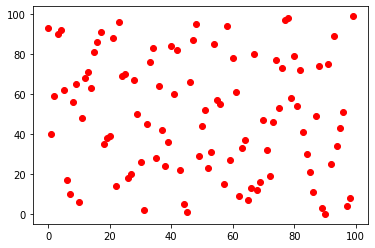

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lst = list(range(100))
random.shuffle(lst)
plt.plot(lst, 'ro');

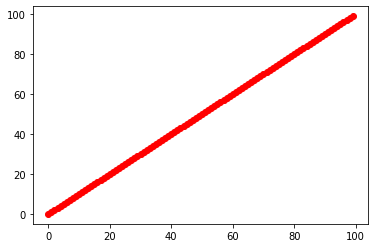

In [16]:
plt.plot(heapsort(lst), 'ro');

In [17]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break

In [18]:
import timeit

def time_insertionsort(n):
    return timeit.timeit('insertion_sort(lst)',
                         f'lst = random.sample(range(1_000_000), {n})',
                         globals=globals(),
                         number=1)

def time_heapsort(n):
    return timeit.timeit('heapsort(lst)',
                         f'lst = random.sample(range(1_000_000), {n})',
                         globals=globals(),
                         number=1)

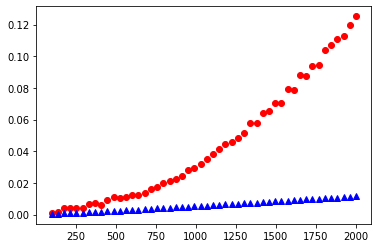

In [19]:
ns = np.linspace(100, 2000, 50, dtype=np.int_)
plt.plot(ns, [time_insertionsort(n) for n in ns], 'ro')
plt.plot(ns, [time_heapsort(n) for n in ns], 'b^');

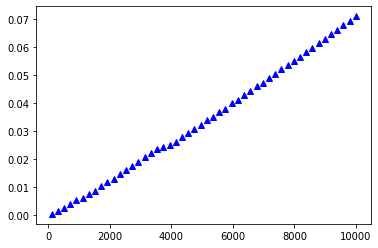

In [20]:
ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'b^');

Heapsort is the first sorting algorithm we've encountered with $O(N \log N)$.